# The `Ecoli` challenge

### Goal

It is your job to predict the `SITE` label. 

### TODO

You are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sk-learn` Python libraries. You can import any model from `sk-learn`.

You are asked to fulfill the following steps; remember to write your insights on the dataset in the card below.

1. Feature pre-processing (e.g., remove useless features, impute missing values, encode some features)
2. Verify the distribution of "Outcome" values
3. Check pairwise correlations among features
4. Split training and test data. When splitting train and test datasets, the test dataset should contain 30% of the data.
5. Plot the training dataset in 2D, are the outcomes separated?
6. Train at least two ML classification models; submissions are evaluated using the accuracy score.
7. Perform hyperparameter optimization for at least one model

In [1]:
# Briefly explain *HERE* the overall steps of your solution (e.g., what did you do and why).
# Briefly write the extracted outcome/insights of each of the previous points here. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from scipy.stats import randint
import seaborn as sns
from sklearn import metrics

# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/ecoli.csv")

In [3]:
df

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [4]:
del df['SEQUENCE_NAME']
df.head()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [5]:
df.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MCG     336 non-null    float64
 1   GVH     336 non-null    float64
 2   LIP     336 non-null    float64
 3   CHG     336 non-null    float64
 4   AAC     336 non-null    float64
 5   ALM1    336 non-null    float64
 6   ALM2    336 non-null    float64
 7   SITE    336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SITE', ylabel='count'>

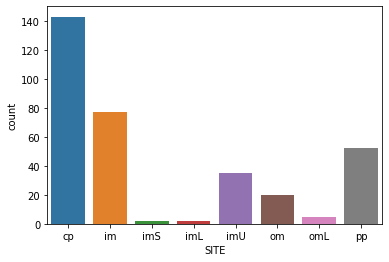

In [7]:
sns.countplot(df['SITE'], label="Count")

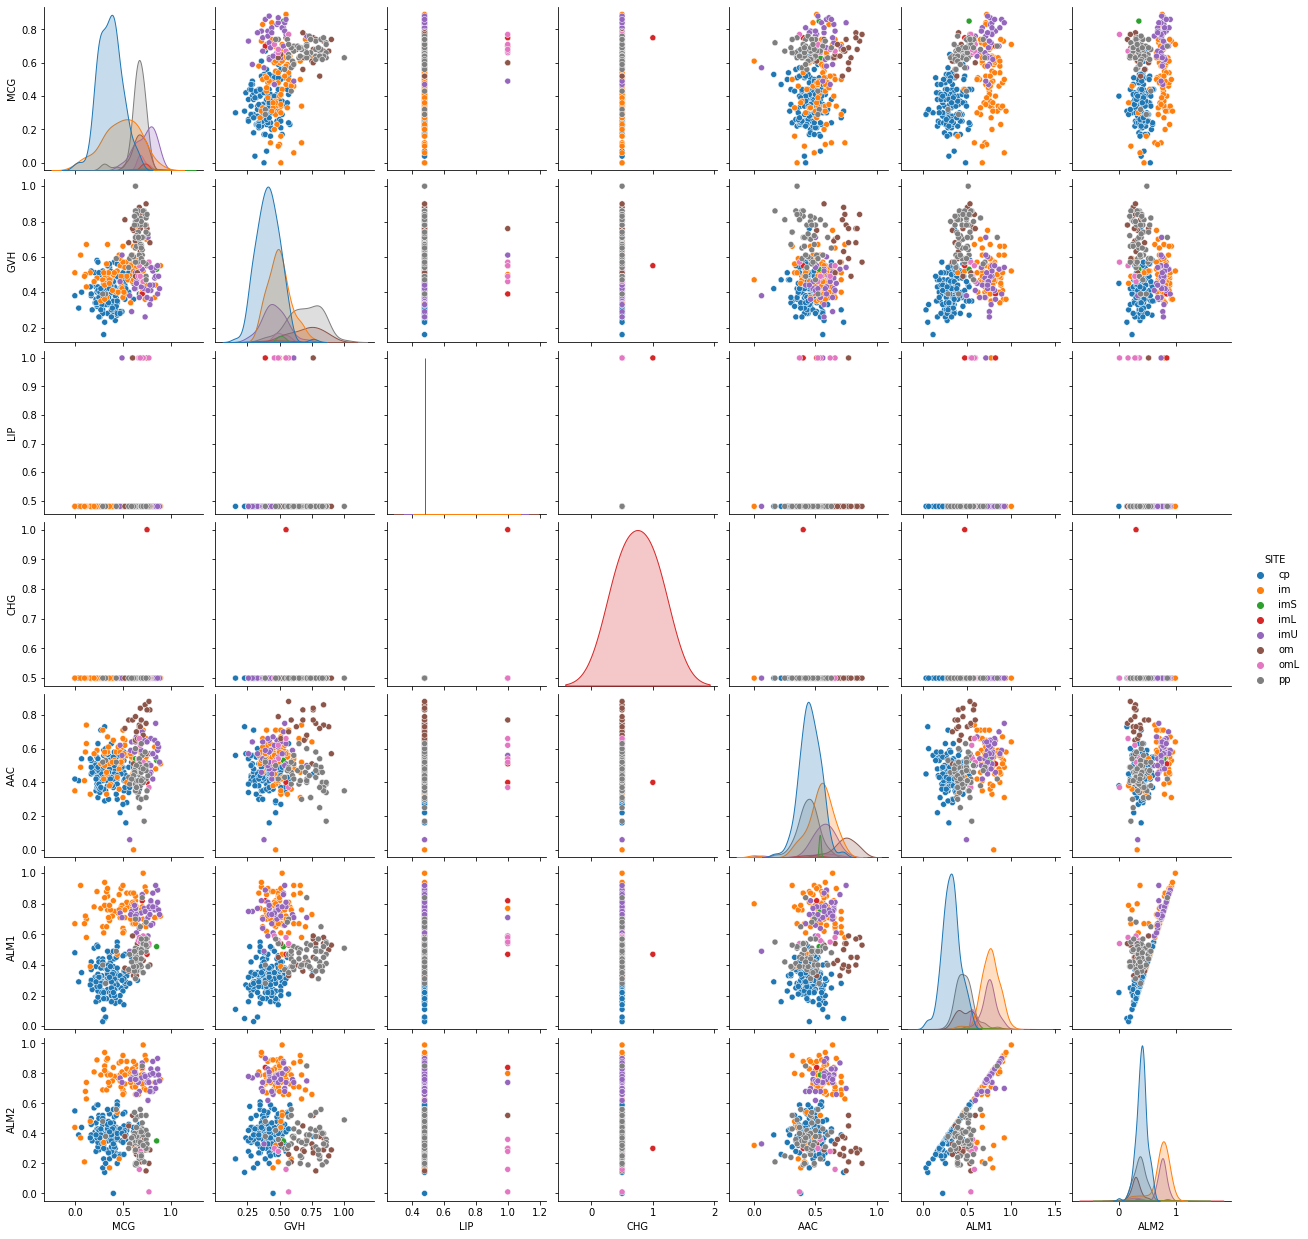

In [8]:
g = sns.pairplot(df, hue='SITE')
plt.show()

In [9]:
scale_mapper = { x: idx for idx, x in enumerate(df["SITE"].unique()) }
df["SITE"] = df["SITE"].replace(scale_mapper)
df["SITE"]

0      0
1      0
2      0
3      0
4      0
      ..
331    7
332    7
333    7
334    7
335    7
Name: SITE, Length: 336, dtype: int64

Check pairwise correlations among variables

In [10]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X = df.drop(columns=["SITE"])
y = df["SITE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(235, 7)
(235,)
(101, 7)
(101,)


Plot training data into 2D

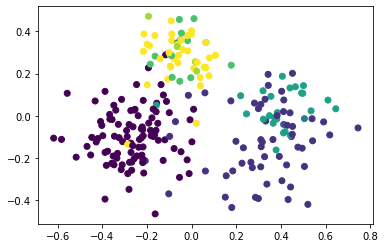

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X_train)

plt.scatter(
    x=result[:,0], 
    y=result[:,1], 
    c=y_train,
    cmap='viridis'
)

C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


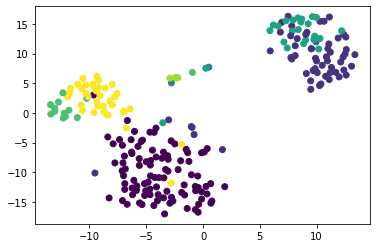

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
result = tsne.fit_transform(X_train.head(2000))

plt.scatter(
    x=result[:,0], 
    y=result[:,1], 
    c=y_train,
    cmap='viridis'
)

0.900990099009901


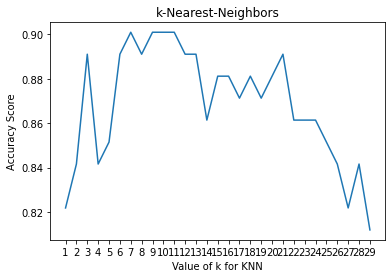

array([0, 0, 7, 0, 7, 0, 4, 7, 7, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0,
       0, 7, 0, 0, 0, 7, 1, 0, 1, 7, 7, 0, 0, 7, 1, 7, 0, 7, 0, 0, 1, 4,
       0, 7, 7, 0, 1, 0, 0, 1, 1, 0, 7, 0, 0, 4, 0, 0, 0, 0, 1, 7, 7, 7,
       0, 1, 0, 4, 7, 7, 0, 0, 0, 0, 7, 1, 0, 0, 1, 1, 0, 1, 0, 4, 1, 7,
       0, 1, 1, 7, 4, 0, 1, 0, 4, 0, 0, 1, 1], dtype=int64)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def fit_knn(X_train, y_train, X_test, y_test):
    k_range = list(range(1, 30))
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    print(max(scores))
    plt.plot(k_range, scores)
    plt.xticks(k_range)
    plt.xlabel('Value of k for KNN')
    plt.ylabel('Accuracy Score')
    plt.title('k-Nearest-Neighbors')
    plt.show()
    return y_pred

fit_knn(X_train, y_train, X_test, y_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier # import the model

def run_forest(n_estimators, max_features):
    # initialize the model (i.e., the estimator)
    forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=42)
    forest.fit(X_train, y_train) # train it
    y_pred = forest.predict(X_test) # predict the cost of houses in the test set
    print(metrics.accuracy_score(y_test, y_pred))
    return y_pred
y_pred = run_forest(100, "auto")

0.8910891089108911


In [15]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy : {}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy : 89.10891089108911%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        46
           1       0.77      0.85      0.81        20
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      0.64      0.78        11
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00         1
           7       0.87      0.87      0.87        15

    accuracy                           0.89       101
   macro avg       0.70      0.65      0.67       101
weighted avg       0.90      0.89      0.89       101



C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [16]:
from sklearn.model_selection import RandomizedSearchCV # for tuning parameter
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, None],
    'min_samples_split': range(2, 11),
    'bootstrap': [True, False],
}

# lets Make a function for Grid Search CV
def gridsearch_cv(model,param_grid, X_train, y_train):
    clf = RandomizedSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=2)
    clf.fit(X_train, y_train)
    print("The best estimator is " + str(clf.best_estimator_))
    print("The best score is " + str(clf.best_score_))

gridsearch_cv(model, param_grid, X, y)

C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


The best estimator is RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=7)
The best score is 0.8719929762949956
